In [1]:
import pandas as pd # type: ignore
import ta


In [2]:
df = pd.read_csv("BTC-USDT.csv")
df["date"] = pd.to_datetime(df["date"],unit="ms")
#Mettre la date en index
df = df.set_index(df["date"])
del df["date"]
df

,open,high,low,close,volume
date,,,,,
2017-08-17 04:00:00,4261.48,4313.62,4261.32,4308.83,47.181009
2017-08-17 05:00:00,4308.83,4328.69,4291.37,4315.32,23.234916
2017-08-17 06:00:00,4330.29,4345.45,4309.37,4324.35,7.229691
2017-08-17 07:00:00,4316.62,4349.99,4287.41,4349.99,4.443249
2017-08-17 08:00:00,4333.32,4377.85,4333.32,4360.69,0.972807
...,...,...,...,...,...
2023-07-03 06:00:00,30673.61,30678.41,30606.00,30651.25,1036.522350
2023-07-03 07:00:00,30651.25,30759.80,30636.65,30667.19,1758.796390
2023-07-03 08:00:00,30667.19,30700.92,30599.07,30640.12,1390.909010


In [3]:
#Moyenne roulante sur 50 et 200 périodes
df["ma50"] = df["close"].rolling(50).mean()
df["ma200"] = df["close"].rolling(200).mean()
df

,open,high,low,close,volume,ma50,ma200
date,,,,,,,
2017-08-17 04:00:00,4261.48,4313.62,4261.32,4308.83,47.181009,NaN,NaN
2017-08-17 05:00:00,4308.83,4328.69,4291.37,4315.32,23.234916,NaN,NaN
2017-08-17 06:00:00,4330.29,4345.45,4309.37,4324.35,7.229691,NaN,NaN
2017-08-17 07:00:00,4316.62,4349.99,4287.41,4349.99,4.443249,NaN,NaN
2017-08-17 08:00:00,4333.32,4377.85,4333.32,4360.69,0.972807,NaN,NaN
...,...,...,...,...,...,...,...
2023-07-03 06:00:00,30673.61,30678.41,30606.00,30651.25,1036.522350,30558.3664,30477.55635
2023-07-03 07:00:00,30651.25,30759.80,30636.65,30667.19,1758.796390,30563.1230,30478.25515
2023-07-03 08:00:00,30667.19,30700.92,30599.07,30640.12,1390.909010,30566.9202,30478.88960


In [4]:
df["buy_signal"] = False
df["sell_signal"] = False
df.loc[df["ma50"] > df["ma200"], "buy_signal"] = True
df.loc[df["ma50"] < df["ma200"], "sell_signal"] = True
df

,open,high,low,close,volume,ma50,ma200,buy_signal,sell_signal
date,,,,,,,,,
2017-08-17 04:00:00,4261.48,4313.62,4261.32,4308.83,47.181009,NaN,NaN,False,False
2017-08-17 05:00:00,4308.83,4328.69,4291.37,4315.32,23.234916,NaN,NaN,False,False
2017-08-17 06:00:00,4330.29,4345.45,4309.37,4324.35,7.229691,NaN,NaN,False,False
2017-08-17 07:00:00,4316.62,4349.99,4287.41,4349.99,4.443249,NaN,NaN,False,False
2017-08-17 08:00:00,4333.32,4377.85,4333.32,4360.69,0.972807,NaN,NaN,False,False
...,...,...,...,...,...,...,...,...,...
2023-07-03 06:00:00,30673.61,30678.41,30606.00,30651.25,1036.522350,30558.3664,30477.55635,True,False
2023-07-03 07:00:00,30651.25,30759.80,30636.65,30667.19,1758.796390,30563.1230,30478.25515,True,False
2023-07-03 08:00:00,30667.19,30700.92,30599.07,30640.12,1390.909010,30566.9202,30478.88960,True,False


In [5]:
balance = 1000 #Valeur du portfolio
position = None #Représente notre position en cours
for index, row in df.iterrows():
    #Buy position
    if position is None and row["buy_signal"] is True:
        buy_price = row["close"]
        usd_size = balance
        position = {
            "buy_price" : buy_price,
            "usd_size":usd_size,
        }
        print(f"{index} - Buy BTC for {usd_size}$ at the price {buy_price}$")
    #Sell position
    elif(position is not None and row["sell_signal"] is True):
        sell_price = row["close"]
        trade_result = (sell_price - position["buy_price"]) / position["buy_price"]
        balance += trade_result * position["usd_size"]
        print(f"{index} - Sell for {balance}$ of {sell_price}$ ({round(trade_result*100,2)}%)")
        position = None

2017-08-25 11:00:00 - Buy BTC for 1000$ at the price 4361.27$
2017-09-04 06:00:00 - Sell for 1022.5851644131182$ of 4459.77$ (2.26%)
2017-09-07 21:00:00 - Buy BTC for 1022.5851644131182$ at the price 4641.13$
2017-09-09 13:00:00 - Sell for 947.4588776015138$ of 4300.16$ (-7.35%)
2017-09-19 09:00:00 - Buy BTC for 947.4588776015138$ at the price 3940.2$
2017-09-22 21:00:00 - Sell for 871.4760516705198$ of 3624.21$ (-8.02%)
2017-09-26 13:00:00 - Buy BTC for 871.4760516705198$ at the price 3928.33$
2017-10-05 07:00:00 - Sell for 921.5617492024618$ of 4154.1$ (5.75%)
2017-10-06 17:00:00 - Buy BTC for 921.5617492024618$ at the price 4336.16$
2017-10-19 19:00:00 - Sell for 1192.0777488092249$ of 5609.0$ (29.35%)
2017-10-20 15:00:00 - Buy BTC for 1192.0777488092249$ at the price 5889.99$
2017-10-25 02:00:00 - Sell for 1072.4670145348434$ of 5299.0$ (-10.03%)
2017-10-27 21:00:00 - Buy BTC for 1072.4670145348434$ at the price 5769.6$
2017-10-28 17:00:00 - Sell for 1059.5983769488328$ of 5700.37$

In [6]:
print(f"Final Balance {round(balance,2)}$")

Final Balance 7847.25$


### Class BacktestCrossMA pour Optimiser le code

In [7]:
class BacktestCrossMA:
    def __init__(self) -> None:
        self.df = pd.DataFrame()

    def load_data(self, path):
        self.df = pd.read_csv(path)
        self.df["date"] = pd.to_datetime(self.df["date"], unit="ms")
        self.df = self.df.set_index(self.df["date"])
        del self.df["date"]

    def populate_indicators(self):
        self.df['ma50'] = self.df['close'].rolling(50).mean()
        self.df['ma200'] = self.df['close'].rolling(200).mean()

    def populate_signals(self):
        self.df['buy_signal'] = False
        self.df['sell_signal'] = False
        self.df.loc[(self.df['ma50'] > self.df['ma200']), 'buy_signal'] = True
        self.df.loc[(self.df['ma50'] < self.df['ma200']), 'sell_signal'] = True

    def run_backtest(self):
        balance = 1000
        position = None
        asset = "BTC"

        for index, row in self.df.iterrows():

            if position is None and row['buy_signal']:
                open_price = row['close']
                position = {
                    'open_price': open_price,
                    'usd_size': balance,
                }
                print(f"{index} - Buy for {balance}$ of {asset} at {open_price}$")

            elif position and row['sell_signal']:
                close_price = row['close']
                trade_result = (close_price - position['open_price']) / position['open_price']
                balance = balance + trade_result * position['usd_size']
                position = None
                print(f"{index} - Sell for {balance}$ of {asset} at {close_price}$")
                
            
        
        print(f"Final balance: {balance}$")

bt = BacktestCrossMA()
bt.load_data('BTC-USDT.csv')
bt.populate_indicators()
bt.populate_signals()
bt.run_backtest()

2017-08-25 11:00:00 - Buy for 1000$ of BTC at 4361.27$
2017-09-04 06:00:00 - Sell for 1022.5851644131182$ of BTC at 4459.77$
2017-09-07 21:00:00 - Buy for 1022.5851644131182$ of BTC at 4641.13$
2017-09-09 13:00:00 - Sell for 947.4588776015138$ of BTC at 4300.16$
2017-09-19 09:00:00 - Buy for 947.4588776015138$ of BTC at 3940.2$
2017-09-22 21:00:00 - Sell for 871.4760516705198$ of BTC at 3624.21$
2017-09-26 13:00:00 - Buy for 871.4760516705198$ of BTC at 3928.33$
2017-10-05 07:00:00 - Sell for 921.5617492024618$ of BTC at 4154.1$
2017-10-06 17:00:00 - Buy for 921.5617492024618$ of BTC at 4336.16$
2017-10-19 19:00:00 - Sell for 1192.0777488092249$ of BTC at 5609.0$
2017-10-20 15:00:00 - Buy for 1192.0777488092249$ of BTC at 5889.99$
2017-10-25 02:00:00 - Sell for 1072.4670145348434$ of BTC at 5299.0$
2017-10-27 21:00:00 - Buy for 1072.4670145348434$ of BTC at 5769.6$
2017-10-28 17:00:00 - Sell for 1059.5983769488328$ of BTC at 5700.37$
2017-10-29 21:00:00 - Buy for 1059.5983769488328$ of

### RSI Indicator

In [8]:
df['rsi'] = ta.momentum.RSIIndicator(close=df["close"], window=14).rsi()
df

,open,high,low,close,volume,ma50,ma200,buy_signal,sell_signal,rsi
date,,,,,,,,,,
2017-08-17 04:00:00,4261.48,4313.62,4261.32,4308.83,47.181009,NaN,NaN,False,False,NaN
2017-08-17 05:00:00,4308.83,4328.69,4291.37,4315.32,23.234916,NaN,NaN,False,False,NaN
2017-08-17 06:00:00,4330.29,4345.45,4309.37,4324.35,7.229691,NaN,NaN,False,False,NaN
2017-08-17 07:00:00,4316.62,4349.99,4287.41,4349.99,4.443249,NaN,NaN,False,False,NaN
2017-08-17 08:00:00,4333.32,4377.85,4333.32,4360.69,0.972807,NaN,NaN,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-07-03 06:00:00,30673.61,30678.41,30606.00,30651.25,1036.522350,30558.3664,30477.55635,True,False,54.549107
2023-07-03 07:00:00,30651.25,30759.80,30636.65,30667.19,1758.796390,30563.1230,30478.25515,True,False,55.885094
2023-07-03 08:00:00,30667.19,30700.92,30599.07,30640.12,1390.909010,30566.9202,30478.88960,True,False,53.034081


<Axes: xlabel='date'>

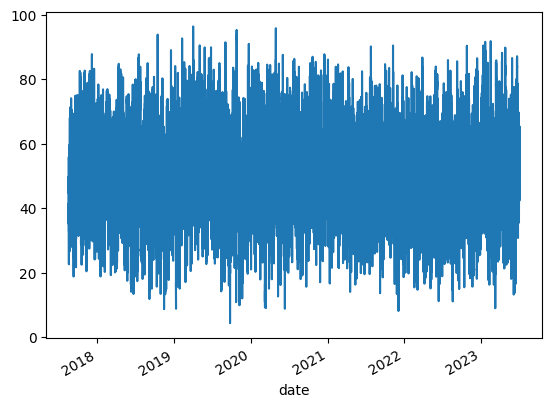

In [9]:
df['rsi'].plot()

## Bollinger Strategy

In [10]:
class BacktestBollingerBands:
    def __init__(self) -> None:
        self.df = pd.DataFrame()

    def load_data(self, path):
        self.df = pd.read_csv(path)
        self.df["date"] = pd.to_datetime(self.df["date"], unit="ms")
        self.df = self.df.set_index(self.df["date"])
        del self.df["date"]

    def populate_indicators(self):
        self.df['BB_MID'] = self.df['close'].rolling(20).mean() 
        rolling_std = self.df['close'].rolling(20).std()
        self.df['BB_UP'] = self.df['BB_MID'] + 2 * rolling_std
        self.df['BB_LOW'] = self.df['BB_MID'] - 2 * rolling_std


    def populate_signals(self):
        self.df['buy_signal'] = False
        self.df['sell_signal'] = False
        self.df.loc[(self.df['close'] > self.df['BB_UP']), 'buy_signal'] = True
        self.df.loc[(self.df['close'] < self.df['BB_MID']), 'sell_signal'] = True

    def run_backtest(self):
        balance = 1000
        position = None
        asset = "BTC"

        for index, row in self.df.iterrows():

            if position is None and row['buy_signal']:
                open_price = row['close']
                position = {
                    'open_price': open_price,
                    'usd_size': balance,
                }
                print(f"{index} - Buy for {balance}$ of {asset} at {open_price}$")

            elif position and row['sell_signal']:
                close_price = row['close']
                trade_result = (close_price - position['open_price']) / position['open_price']
                balance = balance + trade_result * position['usd_size']
                position = None
                print(f"{index} - Sell for {balance}$ of {asset} at {close_price}$")
                
            
        
        print(f"Final balance: {balance}$")

bt = BacktestBollingerBands()
bt.load_data('BTC-USDT.csv')
bt.populate_indicators()
bt.populate_signals()
bt.run_backtest()

2017-08-23 10:00:00 - Buy for 1000$ of BTC at 4228.02$
2017-08-23 19:00:00 - Sell for 973.7584022781348$ of BTC at 4117.07$
2017-08-24 14:00:00 - Buy for 973.7584022781348$ of BTC at 4221.0$
2017-08-25 14:00:00 - Sell for 993.1366789403862$ of BTC at 4305.0$
2017-08-25 16:00:00 - Buy for 993.1366789403862$ of BTC at 4447.31$
2017-08-25 19:00:00 - Sell for 961.8417671427588$ of BTC at 4307.17$
2017-08-27 01:00:00 - Buy for 961.8417671427588$ of BTC at 4379.32$
2017-08-27 08:00:00 - Sell for 944.8905172710715$ of BTC at 4302.14$
2017-08-29 12:00:00 - Buy for 944.8905172710715$ of BTC at 4408.08$
2017-08-30 07:00:00 - Sell for 975.3159542008588$ of BTC at 4550.02$
2017-08-31 10:00:00 - Buy for 975.3159542008588$ of BTC at 4632.96$
2017-09-01 04:00:00 - Sell for 983.5345304139065$ of BTC at 4672.0$
2017-09-01 12:00:00 - Buy for 983.5345304139065$ of BTC at 4793.0$
2017-09-02 03:00:00 - Sell for 982.5228831710647$ of BTC at 4788.07$
2017-09-06 15:00:00 - Buy for 982.5228831710647$ of BTC at